<a href="https://colab.research.google.com/github/adrj67/Arboles_de_Decision/blob/miprim/Mi4_Arboles_Decision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Vemos el dataset de Messi ⚽💥**

Acaba de terminar el primer tiempo y usted quiere saber, en base a la información que tiene, si el equipo donde juega messi va a ganar o perder.

Datos que tenemos (features, atributos, variables, columnas):

* Resultado a favor (cuantos goles hizo el equipo de Messi en el primer tiempo)
* Resultado en contra (cuantos goles hizo el equipo contrario en el primer tiempo)
* Posición en el campo de juego (de Messi)
* Minuto en el que Messi hace un gol
* Tipo de gol (pelota parada, o en juego)
* Visitante o local

Datos que queremos predecir:

* Victoria o derrota al finalizar el partido

## 2.1 Cargamos librerías, clonamos repositorio y leemos dataset

In [ ]:
# Importamos librerias numpy, pandas y matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importamos algoritmo árbol de decisión y la herramienta para plotear el árbol, si empieza con mayuscula es una CLASE (DecisionTreeClassifier),
# si esta en minuscula es una funcion (plot_tree)
from sklearn.tree import DecisionTreeClassifier, plot_tree # Clase Clasificador del arbol de decisiones
from sklearn.model_selection import train_test_split #separa datos de entrenamiento y datos de prueba
from sklearn.metrics import accuracy_score #funcion que mide la exactitud de la prediccion

In [ ]:
# Clonamos el repositorio donde esta el dataset (archivo)
!git clone https://github.com/FacuNieto/Argentina_Programa_4.0.git

Cloning into 'Argentina_Programa_4.0'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 36 (delta 13), reused 4 (delta 0), pack-reused 0
Receiving objects: 100% (36/36), 13.38 MiB | 11.91 MiB/s, done.
Resolving deltas: 100% (13/13), done.


In [ ]:
# Con la funcion de pandas (read_csv), leemos el archivo. Que esta en Archivos>Argentina_Programa_4.0/df_messi_DTC.csv
df_messi = pd.read_csv('/content/Argentina_Programa_4.0/df_messi_DTC.csv')

In [ ]:
df_messi

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist,Minute_decenas,primer_tiempo,segundo_tiempo
0,04/05,LaLiga,34,05-01/05,H,FC Barcelona,Albacete Balompie,2:00,CF,90,2:00,Left-footed shot,Ronaldinho Gaacho,90,False,True
1,05/06,UEFA Champions League,Group Stage,11-02/05,H,FC Barcelona,Panathinaikos Athens,5:00,RW,34,3:00,Left-footed shot,NaN,30,True,False
2,05/06,LaLiga,13,11/27/05,H,FC Barcelona,Racing Santander,4:01,RW,51,2:00,Left-footed shot,Samuel Etoo,50,False,True
3,05/06,LaLiga,19,1/15/06,H,FC Barcelona,Athletic Bilbao,2:01,RW,50,2:01,Left-footed shot,Mark van Bommel,50,False,True
4,05/06,LaLiga,20,1/22/06,H,FC Barcelona,Deportivo Alaves,2:00,CF,82,2:00,Left-footed shot,Ronaldinho Gaacho,80,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692,22/23,Ligue 1,9,10/1/22,H,Paris Saint-Germain,OGC Nice,2:1,AM,28,1:0,Direct free kick,NaN,20,True,False
693,22/23,UEFA Champions League,Group Stage,10/5/22,A,Paris Saint-Germain,SL Benfica,1:1,AM,22,0:1,Left-footed shot,Neymar,20,True,False
694,22/23,Ligue 1,12,10/21/22,A,Paris Saint-Germain,AC Ajaccio,0:3,CF,78,0:2,Left-footed shot,Kylian Mbapp�,70,False,True
695,22/23,UEFA Champions League,Group Stage,10/25/22,H,Paris Saint-Germain,Maccabi Haifa,7:2,SS,19,1:0,Left-footed shot,Kylian Mbapp�,10,True,False


## 2.2 Limpieza

### 2.2.1 Arreglamos la fecha!

In [ ]:
# Es posible notar que eventualmente se ha escrito la fecha separada por '-', por lo que reemplazamos por '/'
df_messi["Date"] = df_messi["Date"].str.replace("-", "/")

In [ ]:
# Separamos cada dia/mes/año por la '/' y creamos una lista[dia, mes, año]
time_data = [f.split('/') for f in df_messi['Date']]

In [ ]:
# Convertimos en un dataframe (tabla) de 3 columnas
time_data_df = pd.DataFrame(time_data)

In [ ]:
# Le damos nombre a las nuevas columnas
time_data_df.columns = ['Mes', 'Día', 'Año']

In [ ]:
# Asignamos las nuevas columnas al dataset general "df_messi"
df_messi['Día'] = time_data_df['Día'].astype(int)
df_messi['Mes'] = time_data_df['Mes'].astype(int)
df_messi['Año'] = time_data_df['Año'].astype(int)

In [ ]:
# Veo las 3 primers filas del dataset para verificar que las
# ultimas columnas son Dia - Mes _ Año
df_messi.head(3)

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist,Minute_decenas,primer_tiempo,segundo_tiempo,Día,Mes,Año
0,04/05,LaLiga,34,05/01/05,H,FC Barcelona,Albacete Balompie,2:00,CF,90,2:00,Left-footed shot,Ronaldinho Gaacho,90,False,True,1,5,5
1,05/06,UEFA Champions League,Group Stage,11/02/05,H,FC Barcelona,Panathinaikos Athens,5:00,RW,34,3:00,Left-footed shot,NaN,30,True,False,2,11,5
2,05/06,LaLiga,13,11/27/05,H,FC Barcelona,Racing Santander,4:01,RW,51,2:00,Left-footed shot,Samuel Etoo,50,False,True,27,11,5


### 2.2.2 Reducimos cantidad de tipos de goles

In [ ]:
# Vemos cuantos tipos de gol existen en la columna Type para reducir las opciones a "penal/tirolibre" y "en juego"
df_messi['Type'].value_counts()

Left-footed shot          432
Penalty                    84
Right-footed shot          83
Direct free kick           51
Header                     24
Tap-in                      9
Solo run                    4
Penalty rebound             3
Deflected shot on goal      2
Counter attack goal         1
Chest                       1
Long distance kick          1
Right-footed shot,          1
Name: Type, dtype: int64

In [ ]:
# Convertimos el tipo de gol en "penal/tirolibre" y "en juego"
# Simplemente almacenamos la información del tipo de gol, según el criterio antes mencionado,
# y lo asignamos a la variable que le corresponde.

 # listas vacias
penal_tlibre = []
en_juego = []

for valor in df_messi['Type']:
  if valor != 'Penalty' and valor != 'Direct free kick':
     penal_tlibre.append(False)
     en_juego.append(True)
  else:
     penal_tlibre.append(True)
     en_juego.append(False)

In [ ]:
# Convertimos en dataframe y asociamos a la base de datos general
df_messi['penal_tlibre'] = pd.DataFrame(penal_tlibre)
df_messi['en_juego'] = pd.DataFrame(en_juego)

### 2.2.2 Generamos columna de victoria

In [ ]:
df_messi['Result'].value_counts()

4:00       47
3:00       43
5:00       42
3:01       38
0:02       35
4:01       35
5:01       32
1:02       30
2:02       29
0:04       27
2:01       23
2:00       23
2:03       21
0:05       21
0:03       20
1:01       20
1:04       19
6:01       18
1:03       17
2:04       15
5:02       13
3:02       13
6:00       11
7:00       11
4:02       10
1:05        8
1:00        8
7:01        7
0:01        7
0:08        6
0:06        5
3:04        5
1:06        4
3:03        4
5:03        3
4:05        3
8:00        3
0:07        2
2:06        2
2:05        2
5:4 AET     2
6:02        2
8:02        2
7:2         2
1:2 AET     1
4:03        1
4:04        1
1:07        1
2:1         1
1:1         1
0:3         1
Name: Result, dtype: int64

In [ ]:
# Borramos la expresion "AET" que aparece en algunos resultados
df_messi["Result"] = df_messi["Result"].str.replace(" AET", "")

In [ ]:
# Separamos cada dato según ":" y almacenamos las listas resultantes en la lista "result_data"
result_data = [f.split(':') for f in df_messi['Result']]

In [ ]:
# Arreglamos la columna resultado dependiendo si es de Local o Visitante (2:0 a 0:2)
for i, val in enumerate(result_data):
  if df_messi['Venue'][i] == 'A': # columna de Local o Visitante
    val.reverse()

In [ ]:
# Convertimos en dataframe y asociamos a dataset general
result_data_df = pd.DataFrame(result_data)
result_data_df.columns = ['Result_fav', 'Result_contra']
df_messi['Result_fav'] = result_data_df['Result_fav'].astype(int)
df_messi['Result_contra'] = result_data_df['Result_contra'].astype(int)

In [ ]:
# Generamos la columna "victoria" basados en la condición de que haya mayor cantidad de goles favorables que en contra
df_messi['victoria'] =  df_messi['Result_fav'] > df_messi['Result_contra']

In [ ]:
df_messi.head(3)

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,...,primer_tiempo,segundo_tiempo,Día,Mes,Año,penal_tlibre,en_juego,Result_fav,Result_contra,victoria
0,04/05,LaLiga,34,05/01/05,H,FC Barcelona,Albacete Balompie,2:00,CF,90,...,False,True,1,5,5,False,True,2,0,True
1,05/06,UEFA Champions League,Group Stage,11/02/05,H,FC Barcelona,Panathinaikos Athens,5:00,RW,34,...,True,False,2,11,5,False,True,5,0,True
2,05/06,LaLiga,13,11/27/05,H,FC Barcelona,Racing Santander,4:01,RW,51,...,False,True,27,11,5,False,True,4,1,True


### 2.2.3 Arreglamos posición

In [ ]:
# La posición tiene problemas, se ve claramente que algunos valores tienen un espacio asociado
df_messi['Playing_Position'].value_counts()

CF     273
RW     220
RW      95
CF      40
SS      32
SS      21
AM       8
AM       7
LW       1
Name: Playing_Position, dtype: int64

In [ ]:
# Solucionar posición
df_messi['Playing_Position'] = df_messi["Playing_Position"].str.replace(" ", "")
df_messi['Playing_Position'] = df_messi["Playing_Position"].str.replace("AM", "SS")
df_messi['Playing_Position'] = df_messi["Playing_Position"].str.replace("LW", "SS")
df_messi['Playing_Position'].value_counts()

RW    315
CF    313
SS     69
Name: Playing_Position, dtype: int64

### 2.2.4 Generamos columnas con resultados luego del gol

In [ ]:
# Resultado luego de realizar el gol en el primer tiempo
result_gol_data = [f.split(':') for f in df_messi['At_score']]

In [ ]:
for indx, val2 in enumerate(result_gol_data):
  if df_messi['Venue'][indx] == 'A':
    val2.reverse()

In [ ]:
# Convertimos en un dataframe
result_gol_data_df = pd.DataFrame(result_gol_data)

In [ ]:
# Nombramos las columnas y asociamos al dataset general convirtiendo los valores a enteros!
result_gol_data_df.columns = ['Result_fav_gol', 'Result_contra_gol']
df_messi['Result_fav_gol'] = result_gol_data_df['Result_fav_gol'].astype(int)
df_messi['Result_contra_gol'] = result_gol_data_df['Result_contra_gol'].astype(int)

### 2.2.5 Encoding de variables

In [ ]:
# como tenemos muchas variables CATEGORICAS, las transformamos en valores numericos (True-False)
# Hacemos one hot encoding para Venue y Playing_Position

messi_df_4encod= df_messi.drop(['Season', 'Competition', 'Matchday', 'Date', 'Club',
       'Opponent', 'Result', 'Minute', 'At_score', 'Type',
       'Goal_assist', 'Minute_decenas', 'primer_tiempo', 'segundo_tiempo',
       'Día', 'Mes', 'Año', 'penal_tlibre', 'en_juego', 'Result_fav',
       'Result_contra', 'victoria', 'Result_fav_gol', 'Result_contra_gol'], axis=1)
display(messi_df_4encod)
encodedVenue = pd.get_dummies(messi_df_4encod.Venue, prefix= 'Venue')
display(encodedVenue)
encodedPosition = pd.get_dummies(messi_df_4encod.Playing_Position, prefix= 'Playing_Position')
display(encodedPosition)


categorias_eval = pd.concat([encodedVenue,
                          encodedPosition], axis=1,ignore_index=False)
display(categorias_eval)

,Venue,Playing_Position
0,H,CF
1,H,RW
2,H,RW
3,H,RW
4,H,CF
...,...,...
692,H,SS
693,A,SS
694,A,CF
695,H,SS


,Venue_A,Venue_H
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
692,0,1
693,1,0
694,1,0
695,0,1


,Playing_Position_CF,Playing_Position_RW,Playing_Position_SS
0,1,0,0
1,0,1,0
2,0,1,0
3,0,1,0
4,1,0,0
...,...,...,...
692,0,0,1
693,0,0,1
694,1,0,0
695,0,0,1


,Venue_A,Venue_H,Playing_Position_CF,Playing_Position_RW,Playing_Position_SS
0,0,1,1,0,0
1,0,1,0,1,0
2,0,1,0,1,0
3,0,1,0,1,0
4,0,1,1,0,0
...,...,...,...,...,...
692,0,1,0,0,1
693,1,0,0,0,1
694,1,0,1,0,0
695,0,1,0,0,1


In [ ]:
# Vemos las 5 columnas que agregamos al final de la tabla
df_messi = pd.concat([df_messi, categorias_eval], axis=1,ignore_index=False)
display(df_messi)

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,...,Result_fav,Result_contra,victoria,Result_fav_gol,Result_contra_gol,Venue_A,Venue_H,Playing_Position_CF,Playing_Position_RW,Playing_Position_SS
0,04/05,LaLiga,34,05/01/05,H,FC Barcelona,Albacete Balompie,2:00,CF,90,...,2,0,True,2,0,0,1,1,0,0
1,05/06,UEFA Champions League,Group Stage,11/02/05,H,FC Barcelona,Panathinaikos Athens,5:00,RW,34,...,5,0,True,3,0,0,1,0,1,0
2,05/06,LaLiga,13,11/27/05,H,FC Barcelona,Racing Santander,4:01,RW,51,...,4,1,True,2,0,0,1,0,1,0
3,05/06,LaLiga,19,1/15/06,H,FC Barcelona,Athletic Bilbao,2:01,RW,50,...,2,1,True,2,1,0,1,0,1,0
4,05/06,LaLiga,20,1/22/06,H,FC Barcelona,Deportivo Alaves,2:00,CF,82,...,2,0,True,2,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692,22/23,Ligue 1,9,10/1/22,H,Paris Saint-Germain,OGC Nice,2:1,SS,28,...,2,1,True,1,0,0,1,0,0,1
693,22/23,UEFA Champions League,Group Stage,10/5/22,A,Paris Saint-Germain,SL Benfica,1:1,SS,22,...,1,1,False,1,0,1,0,0,0,1
694,22/23,Ligue 1,12,10/21/22,A,Paris Saint-Germain,AC Ajaccio,0:3,CF,78,...,3,0,True,2,0,1,0,1,0,0
695,22/23,UEFA Champions League,Group Stage,10/25/22,H,Paris Saint-Germain,Maccabi Haifa,7:2,SS,19,...,7,2,True,1,0,0,1,0,0,1


In [ ]:
df_messi['penal_tlibre'] = df_messi['penal_tlibre'].astype(int)
df_messi['en_juego'] = df_messi['en_juego'].astype(int)
# df_messi['victoria'] = df_messi['victoria'].astype(int)
df_messi['primer_tiempo'] = df_messi['primer_tiempo'].astype(int)
df_messi['segundo_tiempo'] = df_messi['segundo_tiempo'].astype(int)

In [ ]:
# Guardamos el dataset "completo"
df_messi.to_csv('df_messi_completo.csv', index=False)

### 2.2.6 Eliminamos todos los goles del segundo tiempo

In [ ]:
# Eliminamos todos los goles del segundo tiempo!
df_messi = df_messi.drop(df_messi[df_messi['primer_tiempo'] == False].index)

### 2.2.7 Limpiar columnas

In [ ]:
# Eliminamos columnas que no nos sirven
df_messi = df_messi.drop(columns = ['Competition', 'Season', 'Matchday', 'Date', 'Goal_assist', 'primer_tiempo',
                                    'segundo_tiempo', 'Result', 'Type', 'Result_fav', 'Result_contra', 'Club', 'Opponent', 'At_score', 'Venue' , 'Playing_Position', 'Año'])

In [ ]:
# Veamos el dataset que usaremos para crear el modelo
df_messi.head(3)

,Minute,Minute_decenas,Día,Mes,penal_tlibre,en_juego,victoria,Result_fav_gol,Result_contra_gol,Venue_A,Venue_H,Playing_Position_CF,Playing_Position_RW,Playing_Position_SS
1,34,30,2,11,0,1,True,3,0,0,1,0,1,0
7,42,40,1,2,0,1,True,1,0,0,1,1,0,0
10,36,30,9,9,0,1,True,3,0,0,1,0,1,0


In [ ]:
# Guardamos el dataset
df_messi.to_csv('df_messi_Arbol.csv', index=False)

In [ ]:
df_messi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 308 entries, 1 to 696
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Minute               308 non-null    int64
 1   Minute_decenas       308 non-null    int64
 2   Día                  308 non-null    int64
 3   Mes                  308 non-null    int64
 4   penal_tlibre         308 non-null    int64
 5   en_juego             308 non-null    int64
 6   victoria             308 non-null    bool 
 7   Result_fav_gol       308 non-null    int64
 8   Result_contra_gol    308 non-null    int64
 9   Venue_A              308 non-null    uint8
 10  Venue_H              308 non-null    uint8
 11  Playing_Position_CF  308 non-null    uint8
 12  Playing_Position_RW  308 non-null    uint8
 13  Playing_Position_SS  308 non-null    uint8
dtypes: bool(1), int64(8), uint8(5)
memory usage: 23.5 KB


In [ ]:
# Desequilibrio de clases... los arboles son sensibles a esto
# en este caso no hacemos nada, porque es de prueba
df_messi['victoria'].value_counts()

True     264
False     44
Name: victoria, dtype: int64

## 2.3 Creación de modelo (minuto 30:42)

In [ ]:
# Dividiremos el dataset en datos de entrenamiento y de prueba

x = df_messi.drop('victoria', axis = 1) # X= Todas las columnas menos la de victoria
y = df_messi['victoria'] # y= la columna victoria

x_train, x_test ,y_train, y_test = train_test_split( x , y , random_state=10)

In [ ]:
# Entrenamos:
# Profundidad maxima del arbol 6 pisos (max_depth = 6)
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 6).fit(x_train, y_train) # Entrenamiento

# Hacemos la predicción:
y_pred = clf.predict(x_test)

# Probamos accuracy:
print('accuracy =' , accuracy_score(y_test,y_pred))

accuracy = 0.8181818181818182


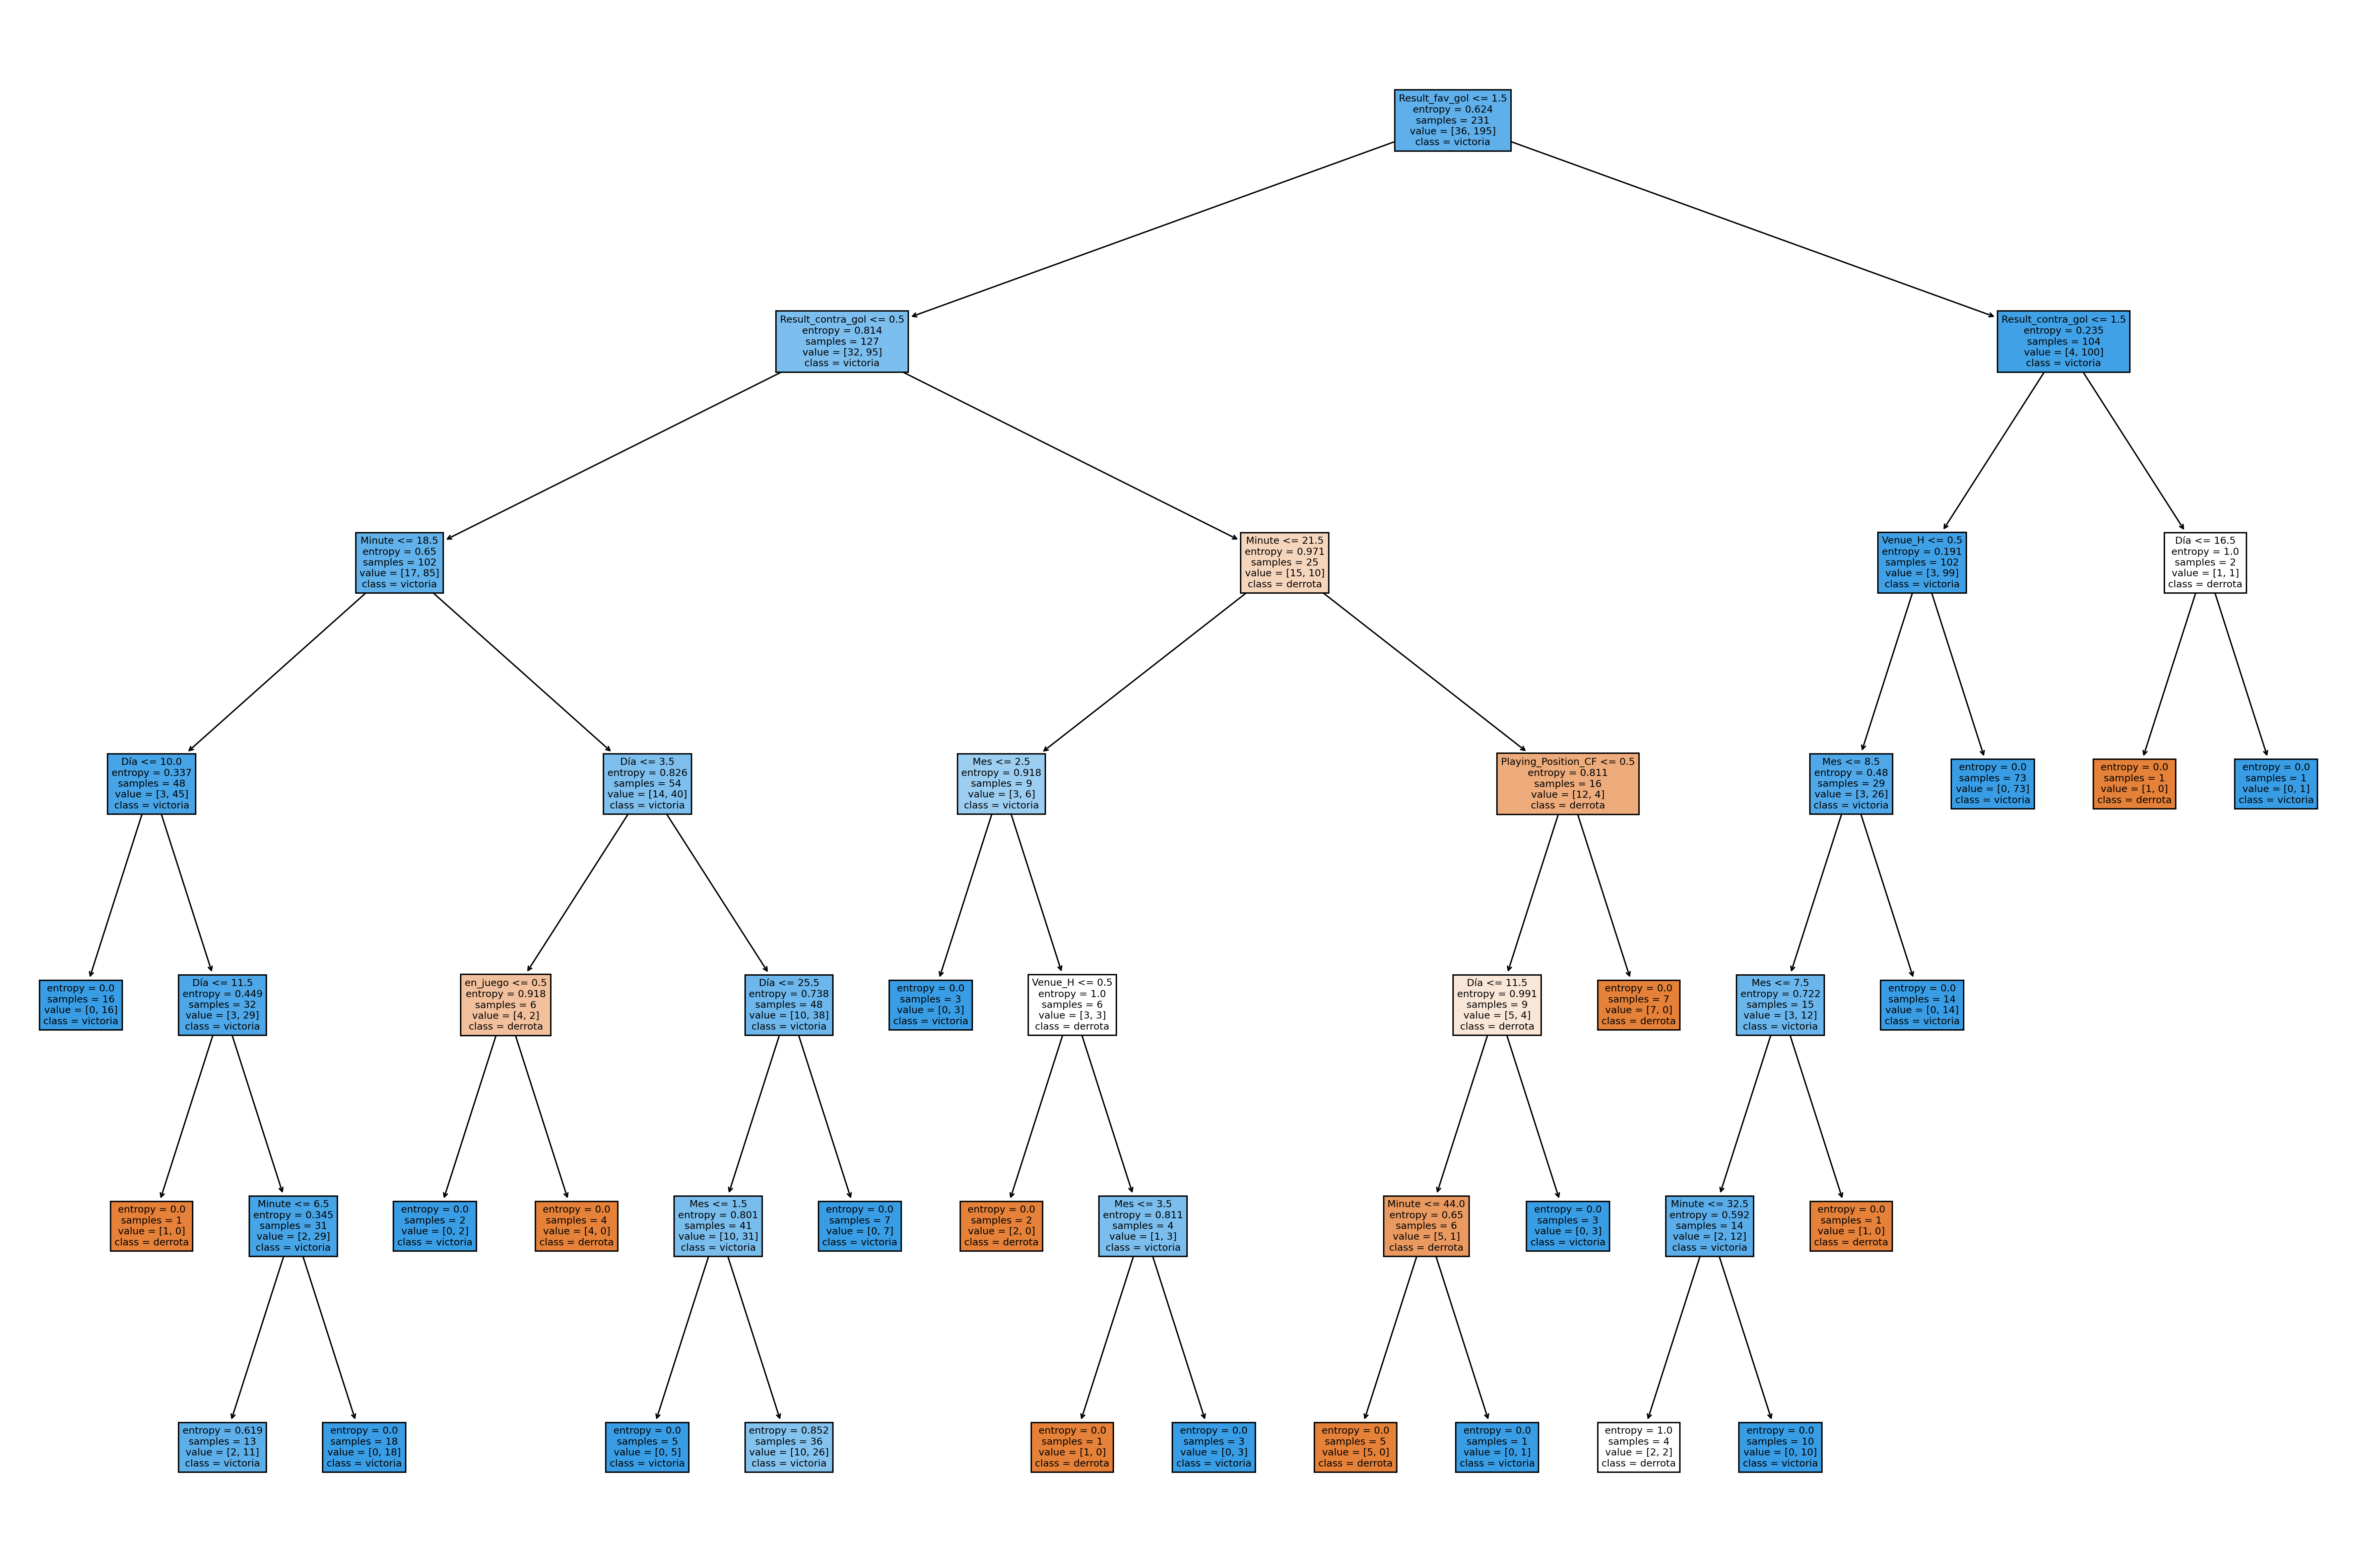

In [ ]:
# Graficamos árbol de decisión.
plt.rcParams["figure.dpi"] = 300
plt.figure(figsize=(30,20))
plot_tree(clf, filled=True, feature_names = x.columns, class_names = ['derrota','victoria'])
# plt.savefig('arbol.png')
plt.show()

## 2.4 Predecir resultado

In [ ]:
#@markdown #Predictor de resultados
#@markdown Si usted ha visto el primer tiempo, Messi ha metido un gol,
#y quiere predecir el resultado del partido,
#por favor ingrese los siguientes datos:

#@markdown ⌛ Minuto en el que Messi hizo el ultimo gol:
minuto = 45 #@param {type:"slider", min:0, max:45, step:1}

#@markdown 📆 Día
dia = 29 #@param {type:"slider", min:1, max:30, step:1}

#@markdown 📆 Mes
mes = 2 #@param {type:"slider", min:1, max:12, step:1}

#@markdown ⚽ Tipo de gol
tipo_de_gol = "Penal/TiroLibre" #@param ["Penal/TiroLibre", "EnJuego"]

#@markdown ✅ Resultado a favor luego de que Messi haga el gol
res_a_favor = 1 #@param {type:"slider", min:1, max:15, step:1}


#@markdown ❌ Resultado en contra luego de que Messi haga el gol
res_en_contra = 1 #@param {type:"slider", min:0, max:15, step:1}


#@markdown 🏠 Visitante o local?
localidad = "Visitante" #@param ["Visitante", "Local"]

#@markdown 💥 En que posición esta jugando Messi?
posi = "RW" #@param ["CF", "RW", "SS"]

if tipo_de_gol == 'Penal/TiroLibre':
  penal_tlibre, en_juego = 1 , 0
else:
  penal_tlibre, en_juego = 0 , 1

if localidad == 'Visitante':
  Venue_A, Venue_H = 1 , 0
else:
  Venue_A, Venue_H = 0 , 1

if posi == "CF":
  Playing_Position_CF, Playing_Position_RW, Playing_Position_SS = 1, 0, 0
elif posi == "RW":
  Playing_Position_CF, Playing_Position_RW, Playing_Position_SS = 0, 1, 0
else:
  Playing_Position_CF, Playing_Position_RW, Playing_Position_SS = 0, 0, 1

entrada = [minuto, (minuto//10), dia, mes, penal_tlibre, en_juego, res_a_favor, res_en_contra, Venue_A, Venue_H, Playing_Position_CF, Playing_Position_RW, Playing_Position_SS  ]

entrada = pd.DataFrame(np.array(entrada).reshape(1, 13))
entrada.columns = ['Minute', 'Minute_decenas', 'Día', 'Mes', 'penal_tlibre', 'en_juego',
       'Result_fav_gol', 'Result_contra_gol', 'Venue_A', 'Venue_H',
       'Playing_Position_CF', 'Playing_Position_RW', 'Playing_Position_SS']
y_pred = clf.predict(entrada)

if y_pred == True:
  print('Victoria')
else:
  print('Derrota')

Victoria


# Links 🎓💻

https://scikit-learn.org/stable/datasets/toy_dataset.html

https://es.wikipedia.org/wiki/Conjunto_de_datos_flor_iris

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


Tener en cuenta:

- Los datos de Iris fueron tomados el mismo día, con lo que eso implica (poca generalización).

- El dataset de Messi tiene clases desbalanceadas. Los árboles son sensibles a datos desbalanceados!

- No hablamos de métricas

Formulario 😎👍🏻

https://forms.gle/Zbn8qVbed8NzuttA6

Sobre el dataset:

Fuente: https://www.kaggle.com/datasets/azminetoushikwasi/-lionel-messi-all-club-goals

Creditos:
* AZMINE TOUSHIK WASI